In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from flow_models import RealNVP
from common import train_gen_network, get_digit_dataset, get_fashion_dataset
from common import plot_digit_imgs
import os
result_dir = 'results'
if not(os.path.exists(result_dir)):
    os.mkdir(result_dir)

In [2]:
IMG_SIZE = 12
LATENT_DIM = IMG_SIZE*IMG_SIZE # dimension
NUM_CLASS = 16 # value range 0-15
HIDDEN_DIM = 256 
LEARNING_RATE = 1e-3
EPOCH = 500
BATCH_SIZE=64
N_BLOCKS = 12
MAX_PATIENCE = 20
plot_func = lambda x: plot_digit_imgs(x, IMG_SIZE, (4, 4))

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [4]:
dataset = get_digit_dataset(IMG_SIZE, NUM_CLASS)
val_len = int(len(dataset)*0.05)
train_dataset, val_dataset = random_split(dataset, [len(dataset) - val_len, val_len])
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

In [5]:
def get_scale_net():
    dim = LATENT_DIM // 2
    return nn.Sequential(
        nn.Linear(dim,  HIDDEN_DIM),
        nn.LeakyReLU(),
        nn.Linear(HIDDEN_DIM, HIDDEN_DIM),
        nn.LeakyReLU(),
        nn.Linear(HIDDEN_DIM, dim),
        nn.Tanh(),
    )

def get_transition_net():
    dim = LATENT_DIM // 2
    return nn.Sequential(
        nn.Linear(dim,  HIDDEN_DIM),
        nn.LeakyReLU(),
        nn.Linear(HIDDEN_DIM, HIDDEN_DIM),
        nn.LeakyReLU(),
        nn.Linear(HIDDEN_DIM, dim),
    )

In [8]:
model = RealNVP(LATENT_DIM, N_BLOCKS, get_scale_net, get_transition_net)
optimizer = torch.optim.Adamax(model.parameters(), LEARNING_RATE)

In [9]:
import matplotlib.pyplot as plt

Epoch:   0%|          | 0/500 [00:00<?, ?it/s]

Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 1 - val_loss=326.2686004638672


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 2 - val_loss=288.35520935058594


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 3 - val_loss=266.68605041503906


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 4 - val_loss=251.46168518066406


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 5 - val_loss=240.71231842041016


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 6 - val_loss=232.77967071533203


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 7 - val_loss=228.23219299316406


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 8 - val_loss=223.03263092041016


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 9 - val_loss=218.0474395751953


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 10 - val_loss=214.1811752319336


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 11 - val_loss=210.25570678710938


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 12 - val_loss=207.193359375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 13 - val_loss=203.39952087402344


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 14 - val_loss=199.22599029541016


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 15 - val_loss=196.94564056396484


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 16 - val_loss=193.2238540649414


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 17 - val_loss=191.08843994140625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 18 - val_loss=187.7391815185547


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 19 - val_loss=183.5877685546875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 20 - val_loss=182.63391876220703


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 21 - val_loss=180.2058334350586


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 22 - val_loss=176.7100830078125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 23 - val_loss=175.84894561767578


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 24 - val_loss=173.34869384765625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 25 - val_loss=170.59412384033203


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 26 - val_loss=168.58588409423828


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 27 - val_loss=165.1373519897461


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 28 - val_loss=164.3387222290039


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 29 - val_loss=162.81536102294922


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 30 - val_loss=160.6363754272461


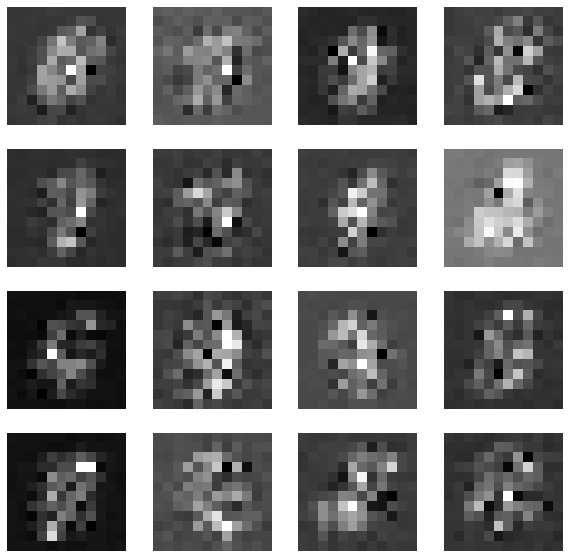

Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 31 - val_loss=159.15062713623047


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 32 - val_loss=156.0904083251953


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 33 - val_loss=157.79541015625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 34 - val_loss=156.05179595947266


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 35 - val_loss=155.63092041015625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 36 - val_loss=152.31392669677734


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 37 - val_loss=150.85477447509766


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 38 - val_loss=150.2833480834961


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 39 - val_loss=148.17803192138672


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 40 - val_loss=147.93450164794922


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 41 - val_loss=145.23703002929688


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 42 - val_loss=146.11795043945312


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 43 - val_loss=144.38140869140625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 44 - val_loss=143.00782775878906


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 45 - val_loss=141.69170379638672


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 46 - val_loss=141.20325469970703


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 47 - val_loss=139.66670989990234


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 48 - val_loss=137.93204498291016


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 49 - val_loss=139.20824432373047


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 50 - val_loss=137.30752563476562


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 51 - val_loss=136.46285247802734


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 52 - val_loss=136.73023223876953


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 53 - val_loss=136.5041046142578


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 54 - val_loss=134.19851684570312


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 55 - val_loss=134.95021057128906


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 56 - val_loss=134.26808166503906


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 57 - val_loss=134.27659606933594


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 58 - val_loss=130.18558502197266


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 59 - val_loss=130.59681701660156


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 60 - val_loss=131.3427734375


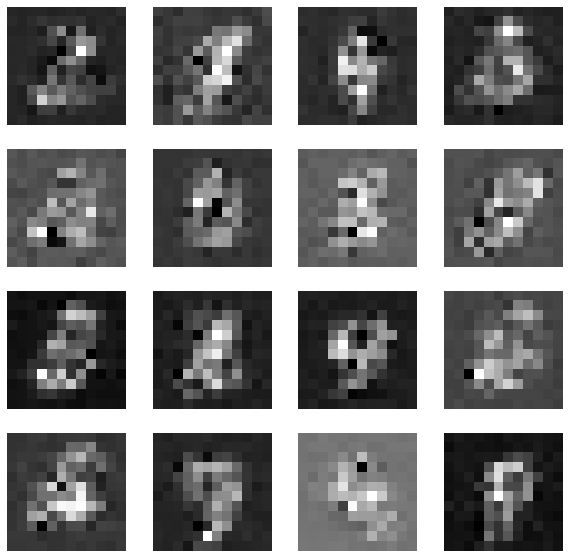

Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 61 - val_loss=130.68134307861328


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 62 - val_loss=131.54746627807617


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 63 - val_loss=131.1762924194336


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 64 - val_loss=126.32552719116211


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 65 - val_loss=127.80160522460938


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 66 - val_loss=128.33994674682617


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 67 - val_loss=126.07056427001953


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 68 - val_loss=127.97135162353516


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 69 - val_loss=125.86111450195312


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 70 - val_loss=124.44965362548828


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 71 - val_loss=126.17022705078125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 72 - val_loss=124.34333801269531


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 73 - val_loss=124.61761474609375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 74 - val_loss=123.42715072631836


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 75 - val_loss=121.42957305908203


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 76 - val_loss=123.01695251464844


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 77 - val_loss=123.50397109985352


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 78 - val_loss=122.56391906738281


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 79 - val_loss=123.26855850219727


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 80 - val_loss=120.3973503112793


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 81 - val_loss=121.0830192565918


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 82 - val_loss=117.41632461547852


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 83 - val_loss=117.8162612915039


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 84 - val_loss=118.307861328125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 85 - val_loss=118.4661750793457


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 86 - val_loss=117.49124908447266


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 87 - val_loss=118.35493087768555


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 88 - val_loss=116.74165344238281


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 89 - val_loss=116.27190017700195


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 90 - val_loss=115.99177169799805


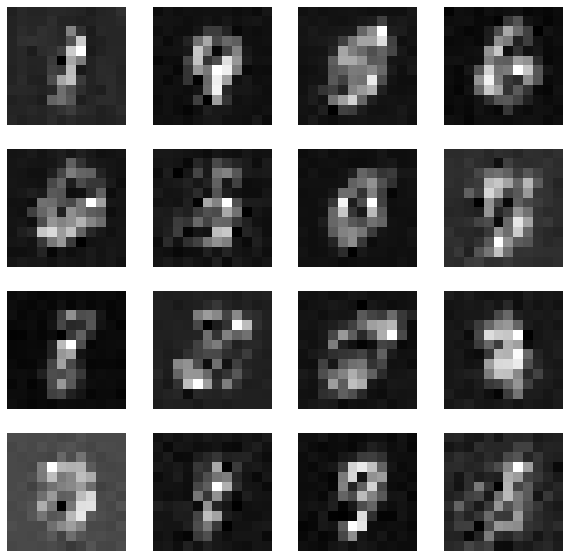

Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 91 - val_loss=116.85361862182617


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 92 - val_loss=115.58963394165039


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 93 - val_loss=115.7959213256836


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 94 - val_loss=115.39194107055664


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 95 - val_loss=114.6192398071289


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 96 - val_loss=113.19384765625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 97 - val_loss=114.15544128417969


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 98 - val_loss=114.17892456054688


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 99 - val_loss=114.15683364868164


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 100 - val_loss=111.61565780639648


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 101 - val_loss=112.13646697998047


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 102 - val_loss=113.31972885131836


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 103 - val_loss=113.24163818359375


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 104 - val_loss=113.61756896972656


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 105 - val_loss=112.24609756469727


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 106 - val_loss=113.13824462890625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 107 - val_loss=110.89995193481445


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 108 - val_loss=110.99016952514648


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 109 - val_loss=111.29172897338867


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 110 - val_loss=111.30672454833984


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 111 - val_loss=110.9947624206543


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 112 - val_loss=109.03454971313477


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 113 - val_loss=108.83749389648438


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 114 - val_loss=109.0455322265625


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 115 - val_loss=109.54217910766602


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 116 - val_loss=108.48023223876953


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 117 - val_loss=109.4749984741211


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 118 - val_loss=109.69591522216797


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 119 - val_loss=107.64780044555664


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 120 - val_loss=107.97055053710938


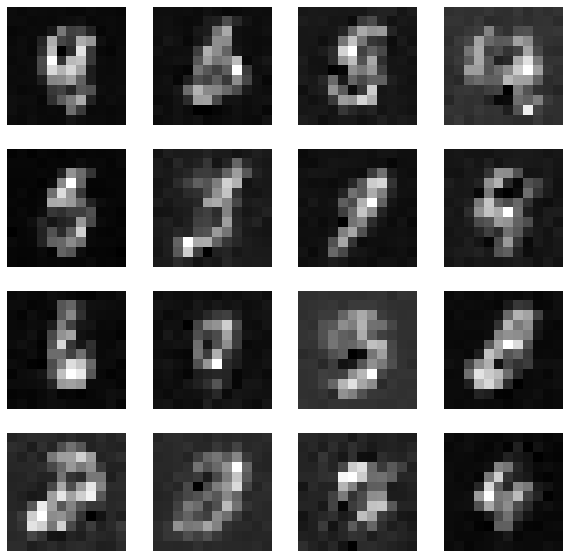

Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 121 - val_loss=107.78367614746094


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 122 - val_loss=107.45079040527344


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 123 - val_loss=108.36924743652344


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 124 - val_loss=108.90491104125977


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 125 - val_loss=108.30908966064453


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 126 - val_loss=106.53229904174805


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 127 - val_loss=110.52941131591797


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 128 - val_loss=108.60745620727539


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 129 - val_loss=109.34721374511719


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 130 - val_loss=111.15502166748047


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 131 - val_loss=109.46623229980469


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 132 - val_loss=107.04325103759766


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 133 - val_loss=108.88673782348633


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 134 - val_loss=108.72772216796875


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 135 - val_loss=107.09871292114258


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 136 - val_loss=107.65170288085938


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 137 - val_loss=106.79405212402344


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 138 - val_loss=107.66601943969727


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 139 - val_loss=108.48309707641602


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 140 - val_loss=109.73565673828125


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 141 - val_loss=106.59000015258789


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 142 - val_loss=107.66843032836914


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 143 - val_loss=107.96329879760742


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 144 - val_loss=106.31818389892578


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 145 - val_loss=108.18597793579102


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 146 - val_loss=110.38016128540039


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 147 - val_loss=108.23635482788086


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 148 - val_loss=106.81693649291992


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 149 - val_loss=108.27193832397461


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 150 - val_loss=108.09732818603516


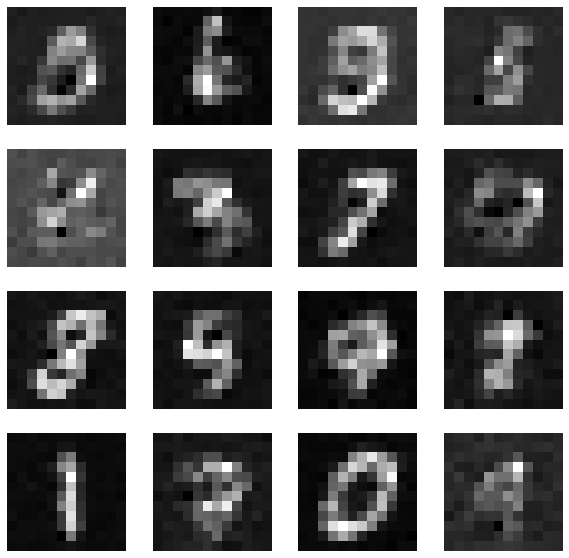

Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 151 - val_loss=107.67884063720703


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 152 - val_loss=109.77326583862305


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 153 - val_loss=108.43450546264648


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 154 - val_loss=111.57213592529297


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 155 - val_loss=108.98553848266602


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 156 - val_loss=108.67994689941406


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 157 - val_loss=106.76290130615234


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 158 - val_loss=106.62543869018555


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 159 - val_loss=112.67494583129883


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 160 - val_loss=109.2726936340332


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 161 - val_loss=111.98020553588867


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 162 - val_loss=110.81632232666016


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 163 - val_loss=110.46034622192383


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 164 - val_loss=111.87358856201172


Training:   0%|          | 0/30 [00:00<?, ?it/s]

Validating:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 165 - val_loss=111.52382278442383


In [10]:
results = train_gen_network(os.path.join(result_dir,"flow_e_{}.pt"), model, MAX_PATIENCE, train_loader, val_loader, EPOCH, device, optimizer=optimizer, plot_func=plot_func, plot_img_interval=30)
results = pd.DataFrame(results)

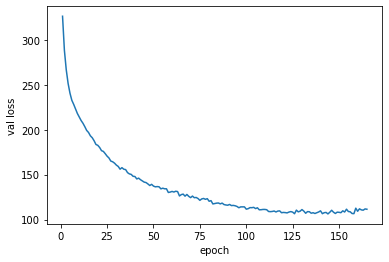

In [11]:
sns.lineplot(x="epoch", y="val loss", data=results)
plt.show()

In [12]:
model = torch.load(os.path.join(result_dir, 'flow_e_144.pt'))

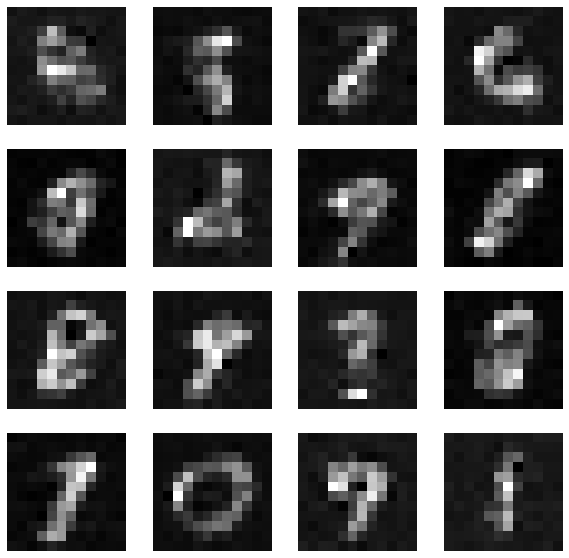

In [13]:
imgs = model.inference(16, device).detach().cpu()
plot_digit_imgs(imgs, IMG_SIZE, (4,4))